In [2]:
import os
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import json
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

TRAINING_DATA_FOLDER_NAME = 'arcdata/evaluation';

fileNames = os.listdir(TRAINING_DATA_FOLDER_NAME);

curIndex = -1;

set_labels = ""

# create discrete colormap
cmap = colors.ListedColormap(['black', 'blue', 'red', 'green', 'yellow', 'grey', 'pink', 'orange', 'cyan', 'darkred'])

def printGrid(ax, data):
  ax.imshow(data, cmap=cmap, norm=colors.Normalize(vmin=0, vmax=9))
  ax.grid(which='major', axis='both', color='w', linewidth=1)
  ax.set_xticks(np.arange(-.5, len(data[0]), 1));
  ax.set_yticks(np.arange(-.5, len(data), 1));
  ax.set_yticklabels([])
  ax.set_xticklabels([])

def getSize(grid):
  return f'{len(grid)}x{len(grid[0])}'


def displayTask(fileName):
  with open(f'{TRAINING_DATA_FOLDER_NAME}/{fileName}', 'r') as file:
    data = json.loads(file.read())
    #print(data)

  plt.rcParams['figure.figsize'] = [20, 5]
  fig, axs = plt.subplots(1,len(data['train'])*2);
  for i, train in enumerate(data['train']):
    fig.suptitle(fileName);
    fig.figsize=(12, 1)
    axs[i*2].set_title(f'input {getSize(train["input"])}'); axs[i*2+1].set_title(f'output {getSize(train["output"])}');
    print(train['input'])
    printGrid(axs[i*2], train['input']);
    printGrid(axs[i*2+1], train['output']);
  
  plt.rcParams['figure.figsize'] = [8, 5]
  fig, axs = plt.subplots(1,2);
  for i, test in enumerate(data['test']):
    fig.suptitle('SOLUTION', fontsize=16)
    axs[i*2].set_title(f'input {getSize(test["input"])}'); axs[i*2+1].set_title(f'output {getSize(test["output"])}');
    printGrid(axs[i*2], test['input']);
    printGrid(axs[i*2+1], test['output']);

def loadLabels(fileName):
  fileNameLabels = os.path.splitext(fileName)[0] + "_labels.json";
  if(os.path.isfile(f'{TRAINING_DATA_FOLDER_NAME}/{fileNameLabels}')):
    with open(f'{TRAINING_DATA_FOLDER_NAME}/{fileNameLabels}', 'r') as file:
      data = json.loads(file.read())
      return data
  else:
    return "file doesn't exist"
def saveLabels(fileName):
  fileNameLabels = os.path.splitext(fileName)[0] + "_explanation.json";
  with open(f'{TRAINING_DATA_FOLDER_NAME}/{fileNameLabels}', 'w+') as file:
    data = json.dumps(set_labels.split(','))
    print(f"saved {data} to {fileNameLabels}")
    file.seek(0)
    file.write(data)
    file.truncate()

def displayCurTask():
  global fileName
  fileName = fileNames[curIndex];
  displayTask(fileName);
  loadLabels(fileName);
  plt.show()

button = widgets.Button(description="Show next")
output = widgets.Output()
def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    global fileName; global curIndex;
    clear_output()
    curIndex+=1;
    print(f"Index Number: {curIndex}")
    displayCurTask()
    print(f"CURRENT LABELS: {loadLabels(fileName)}");
button.on_click(on_button_clicked)
display(button, output)

Button(description='Show next', style=ButtonStyle())

Output()

In [38]:
############# ADD LABELS ####################
#Example: rotate,move,fill
set_labels = "" #@param {type:"string"}
saveLabels(fileName);

print(loadLabels(fileName))

saved ["find_object", " multiply_object", " recolor_object"] to 15113be4_labels.json
['find_object', ' multiply_object', ' recolor_object']


In [ ]:
## NOT PART OF THE TOOL LEL

# Finds out what format the solution should have


with open(f'{TRAINING_DATA_FOLDER_NAME}/{fileName}', 'r') as file:
    data = json.loads(file.read())

input_row_arr = []
input_column_arr = []
output_row_arr = []
output_column_arr = []

for exercise in data['train']:
  input_rows = len(exercise['input'])
  input_columns = len(exercise['input'][0])

  output_rows = len(exercise['output'])
  output_columns = len(exercise['output'][0])

  input_row_arr.append(input_rows)
  input_column_arr.append(input_columns)
  output_row_arr.append(output_rows)
  output_column_arr.append(output_columns)


#Per task
if all(x==input_row_arr[0] for x in input_row_arr) and all(x==input_column_arr[0] for x in input_column_arr):
  print("the input grids are all the same size")
if all(x==output_row_arr[0] for x in output_row_arr) and all(x==output_column_arr[0] for x in output_column_arr):
  print("the output grids are all the same size")

if all(input_row_arr[i]==output_row_arr[i] for i in range(len(input_row_arr))):
  print("the input grid rows equals the output grid row per task")
if all(input_column_arr[i]==output_column_arr[i] for i in range(len(input_column_arr))):
  print("the input grid columns equals the output grid columns per task")

#Over all tasks
if all(input_row_arr[i]==input_row_arr[0]==output_row_arr[i] for i in range(len(input_row_arr))):
  print("each input grid row equals each output grid row")
if all(input_column_arr[i]==input_column_arr[0]==output_column_arr[i] for i in range(len(input_column_arr))):
  print("each input grid column equals each output grid column")

In [3]:
#[[3, 3, 8], [3, 7, 0], [5, 0, 0]]
#[[0, 0, 5], [0, 7, 3], [8, 3, 3]]

def rotate(A):
    return np.fliplr(A.T)

# {"input": [[5, 5, 2], [1, 0, 0], [0, 0, 0]], "output": [[0, 0, 0], [0, 0, 1], [2, 5, 5]]}
A = np.array([[3, 3, 8], [3, 7, 0], [5, 0, 0]])
B = np.array([[0, 0, 5], [0, 7, 3], [8, 3, 3]])

numberOfRotations = 0
while (A!=B).any() and numberOfRotations < 4:
    A = rotate(A)
    print(A)
    numberOfRotations = numberOfRotations + 1
    
print(numberOfRotations)

A2 = np.array([[5, 5, 2], [1, 0, 0], [0, 0, 0]])
B2 = np.array([[0, 0, 0], [0, 0, 1], [2, 5, 5]])

for i in range(0, numberOfRotations):
    A2 = rotate(A2)
print(A2 == B2)



[[5 3 3]
 [0 7 3]
 [0 0 8]]
[[0 0 5]
 [0 7 3]
 [8 3 3]]
2
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


16b78196.json
1990f7a8.json
1c56ad9f.json
20981f0e.json
42a15761.json
4364c1c4.json
4acc7107.json
4e45f183.json
5783df64.json
5ffb2104.json
64a7c07e.json
66e6c45b.json
67636eac.json


C:\Users\axgno01\AppData\Local\Temp\ipykernel_24328\3389512502.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,len(data['train'])*2);


67c52801.json
68b67ca3.json
6ad5bdfd.json
85b81ff1.json
8ee62060.json
90347967.json
93b4f4b3.json
9b4c17c4.json
Error: 9b4c17c4.json
9c56f360.json
ac2e8ecf.json
b1fc8b8e.json
Error: b1fc8b8e.json
b7cb93ac.json
ca8de6ea.json
d017b73f.json
d282b262.json
dc2aa30b.json
df8cc377.json
e1d2900e.json
e21a174a.json
Error: e21a174a.json
e41c6fd3.json
e74e1818.json
f3cdc58f.json
f3e62deb.json
Error: f3e62deb.json
f45f5ca7.json
number: 37 Percentage: 9.25


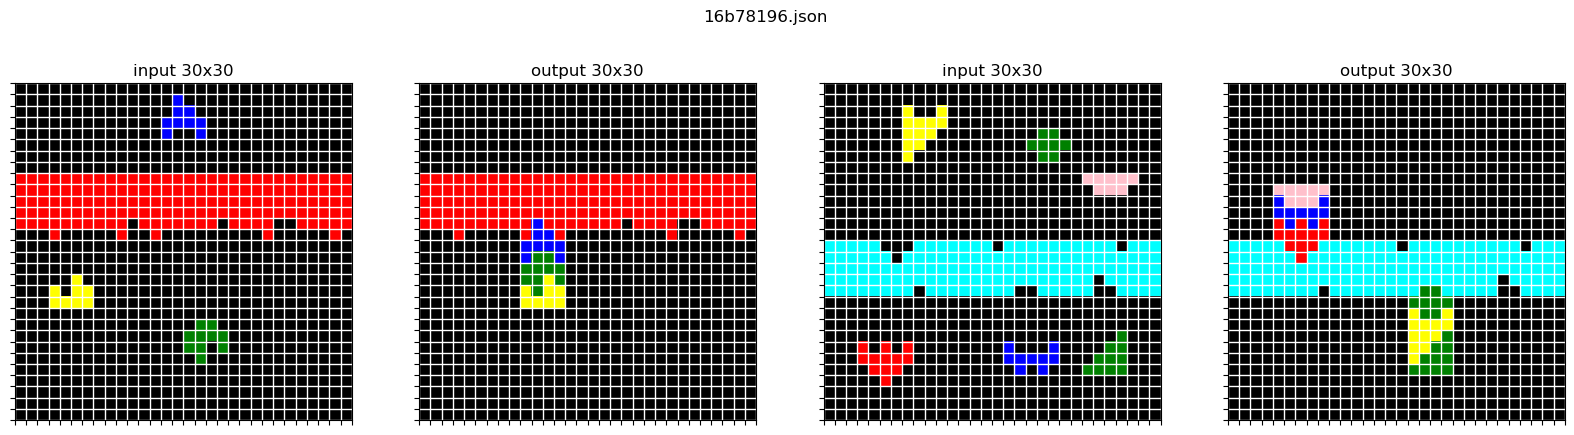

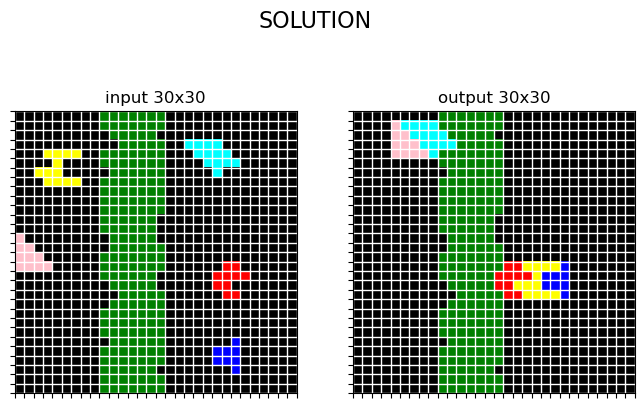

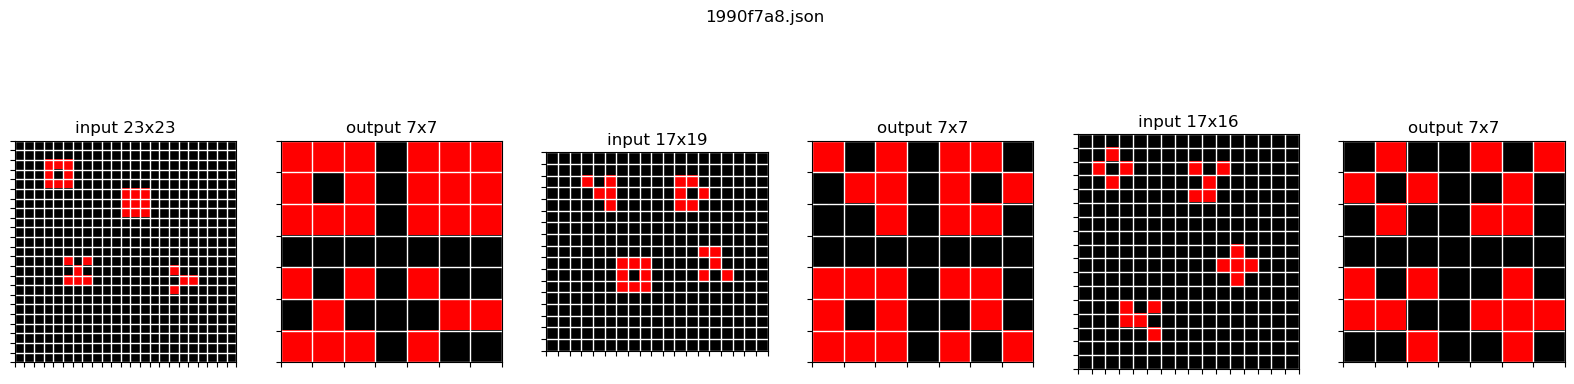

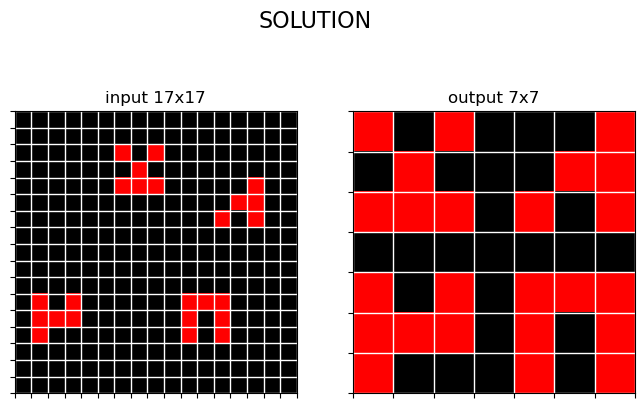

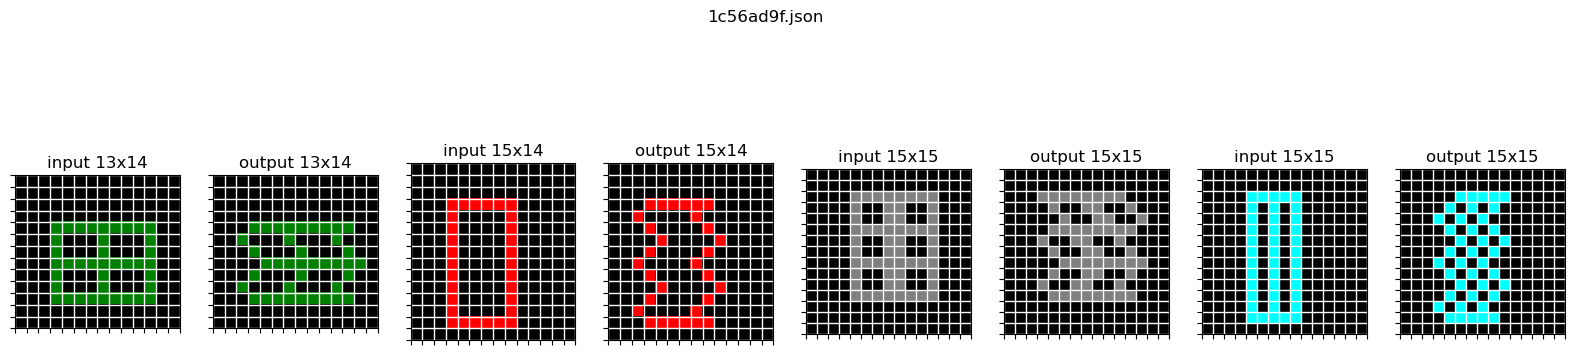

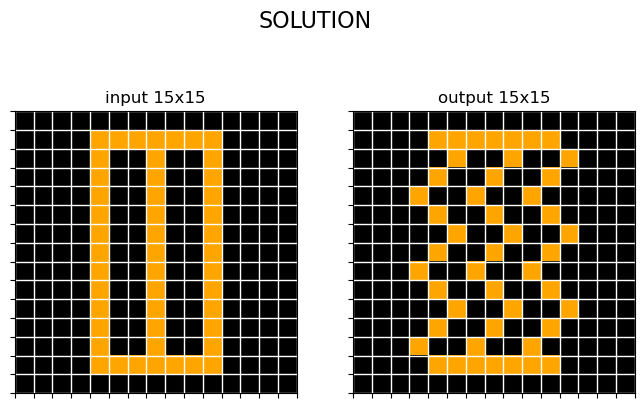

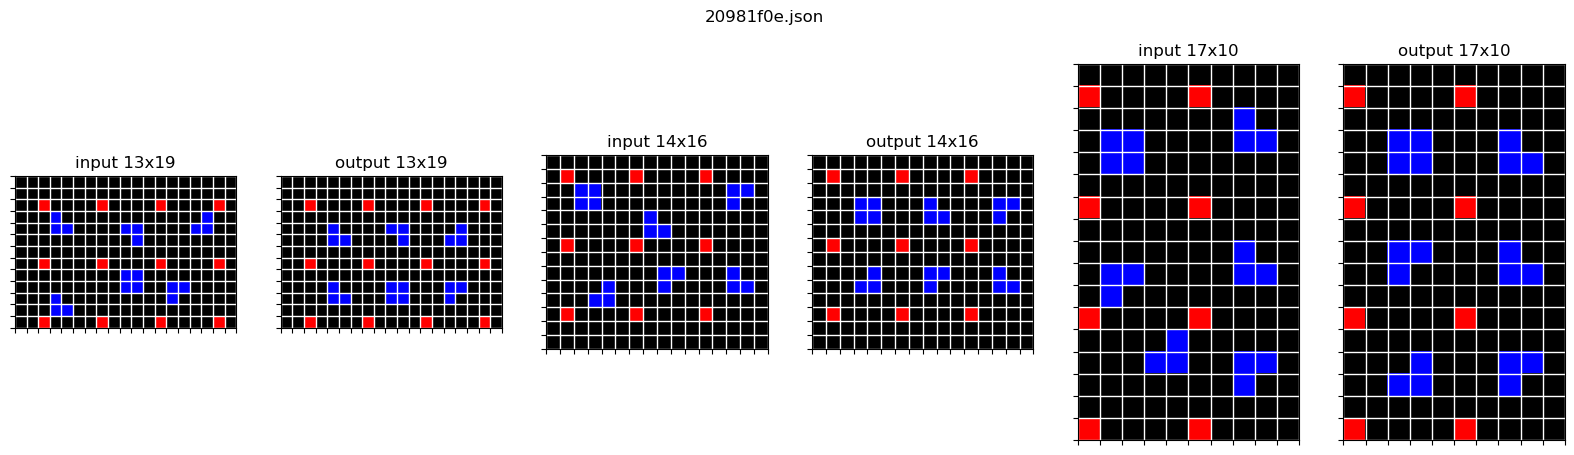

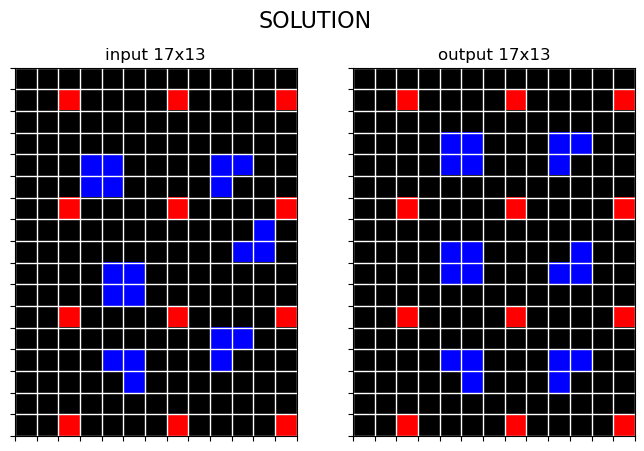

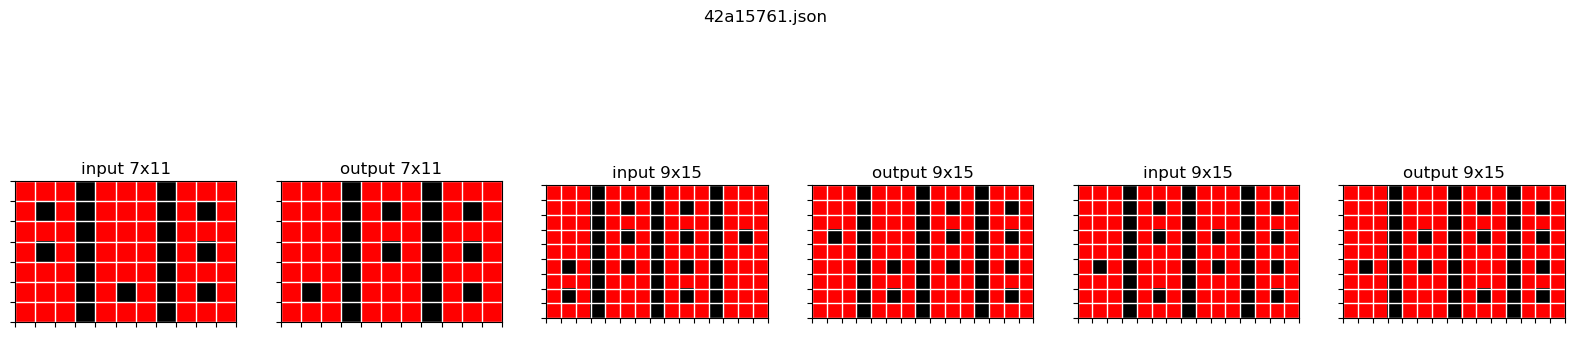

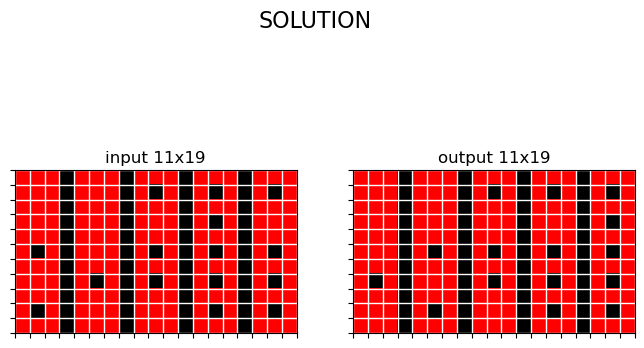

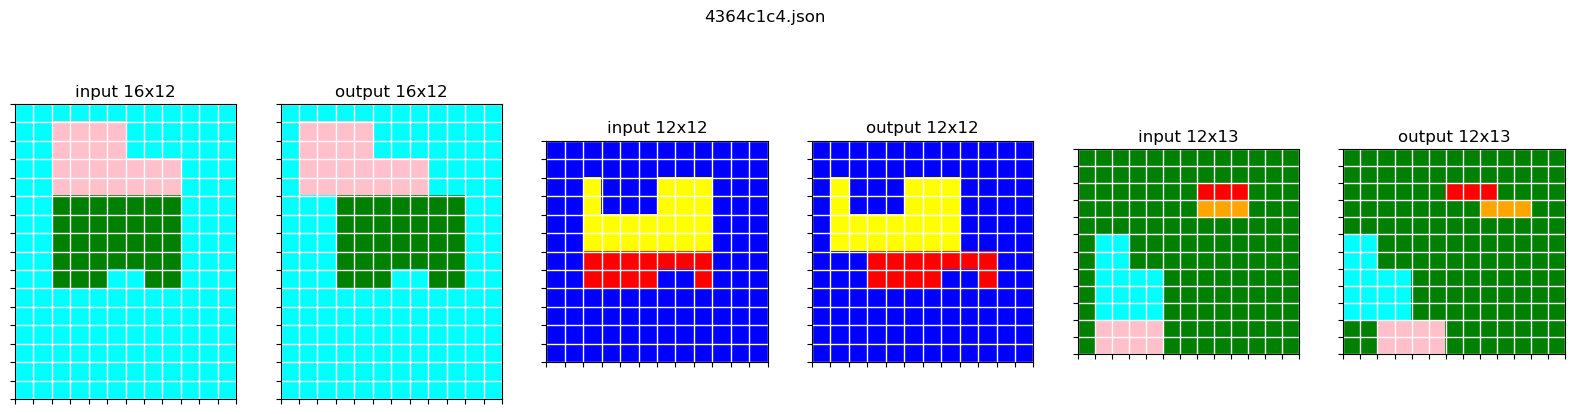

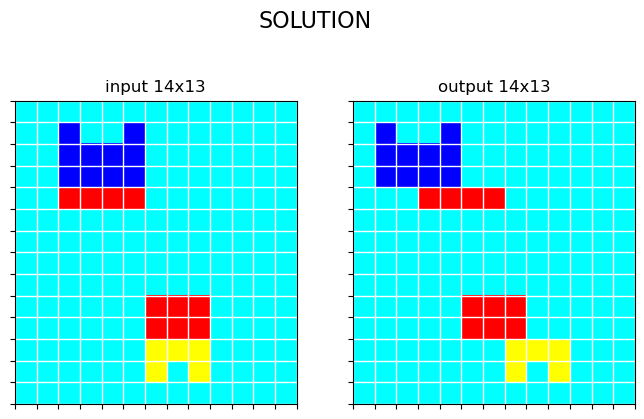

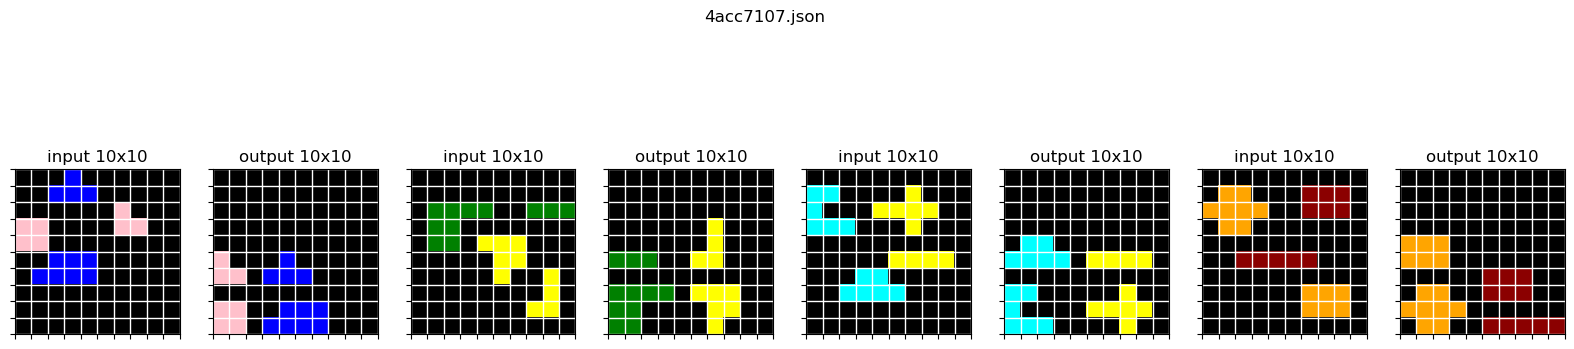

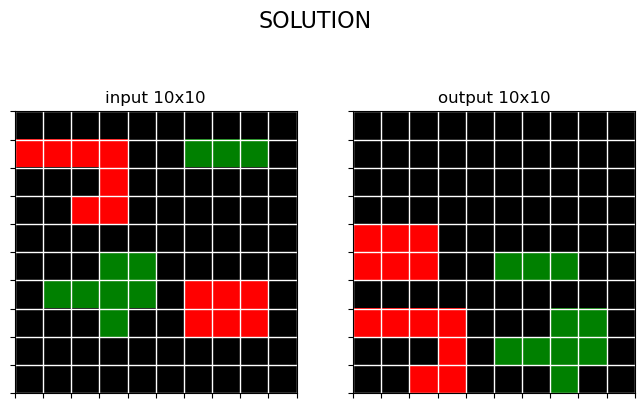

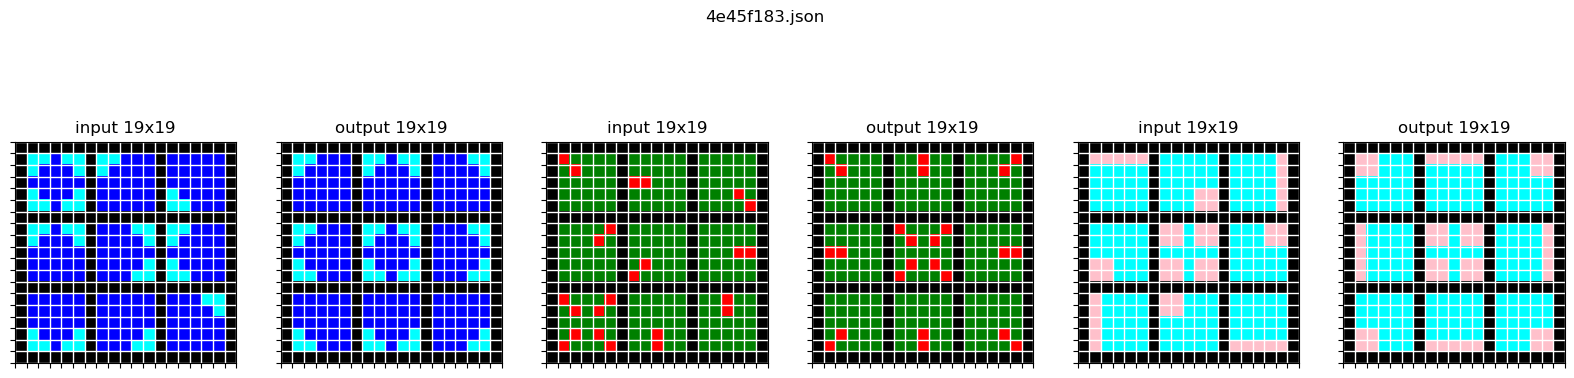

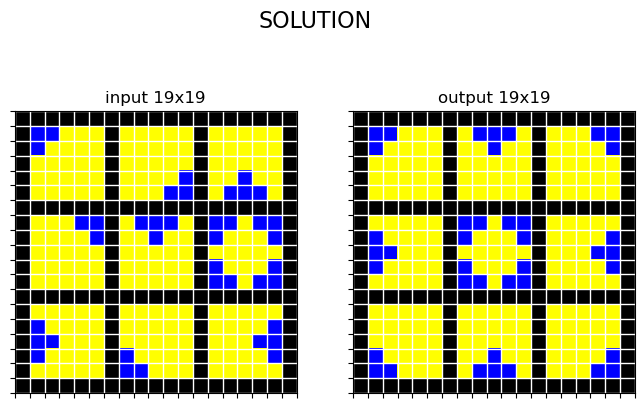

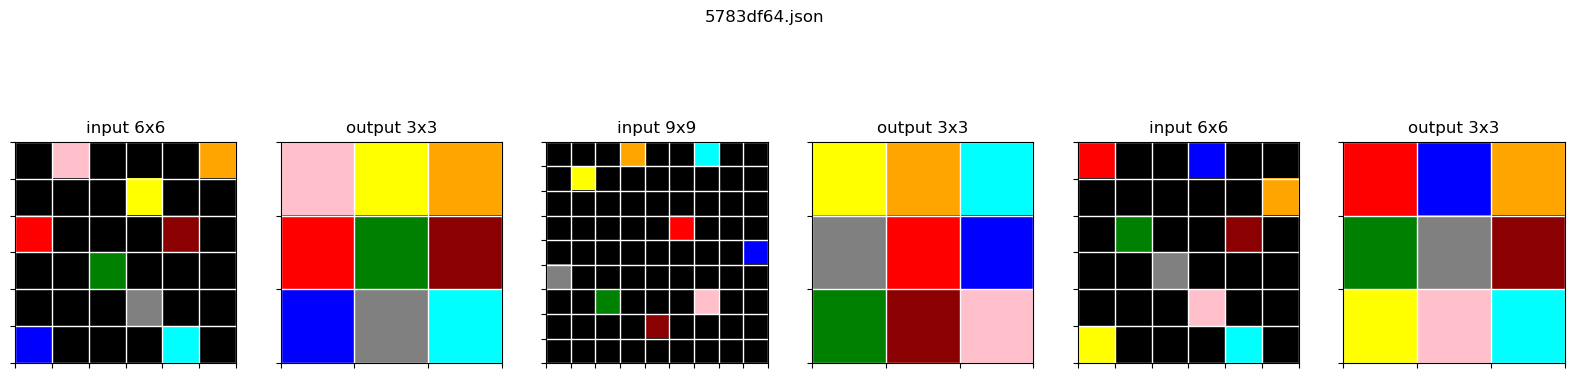

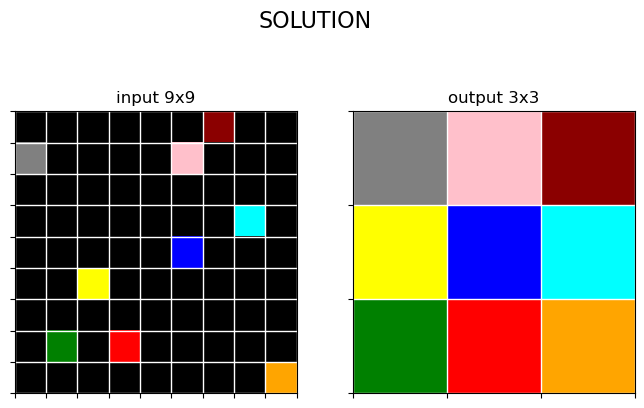

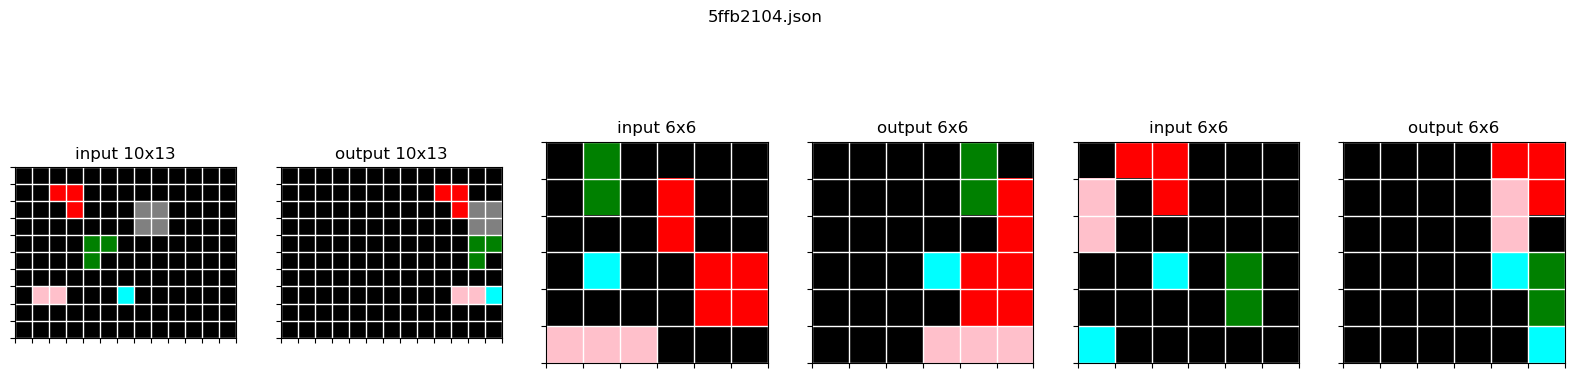

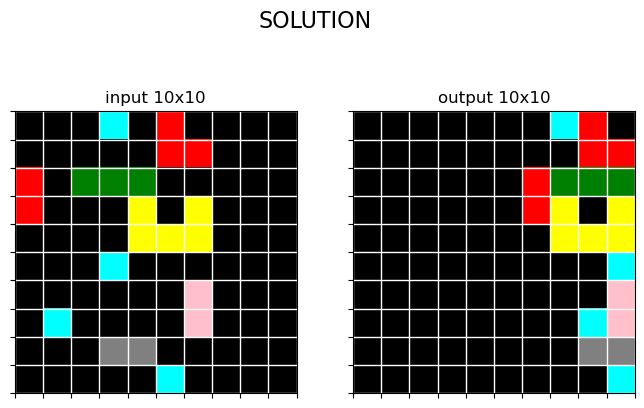

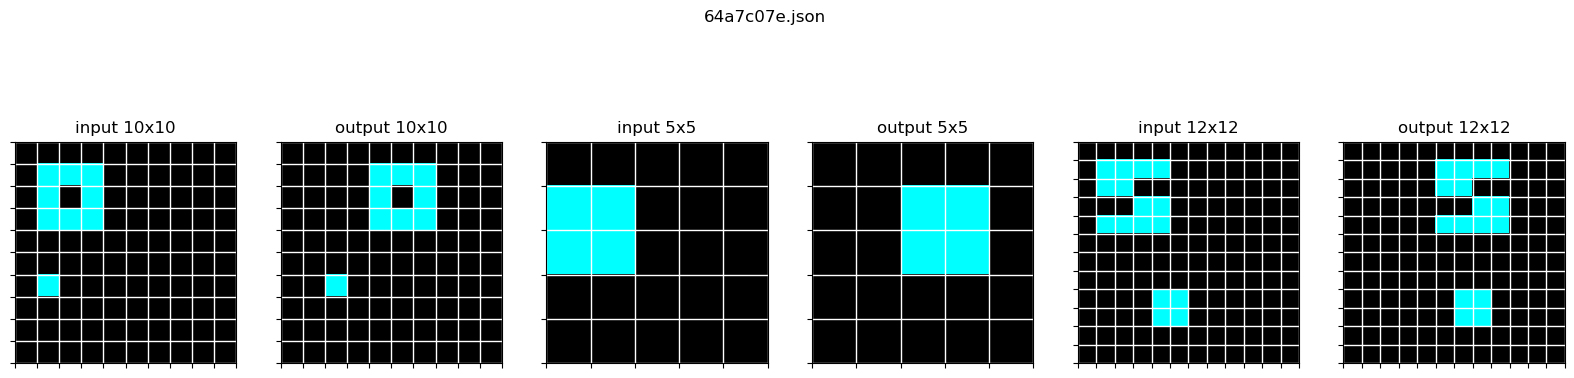

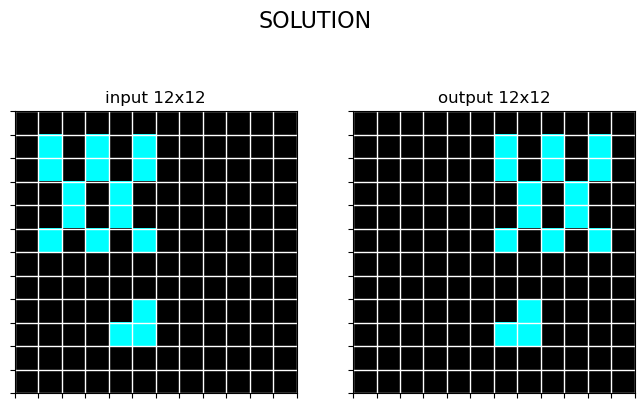

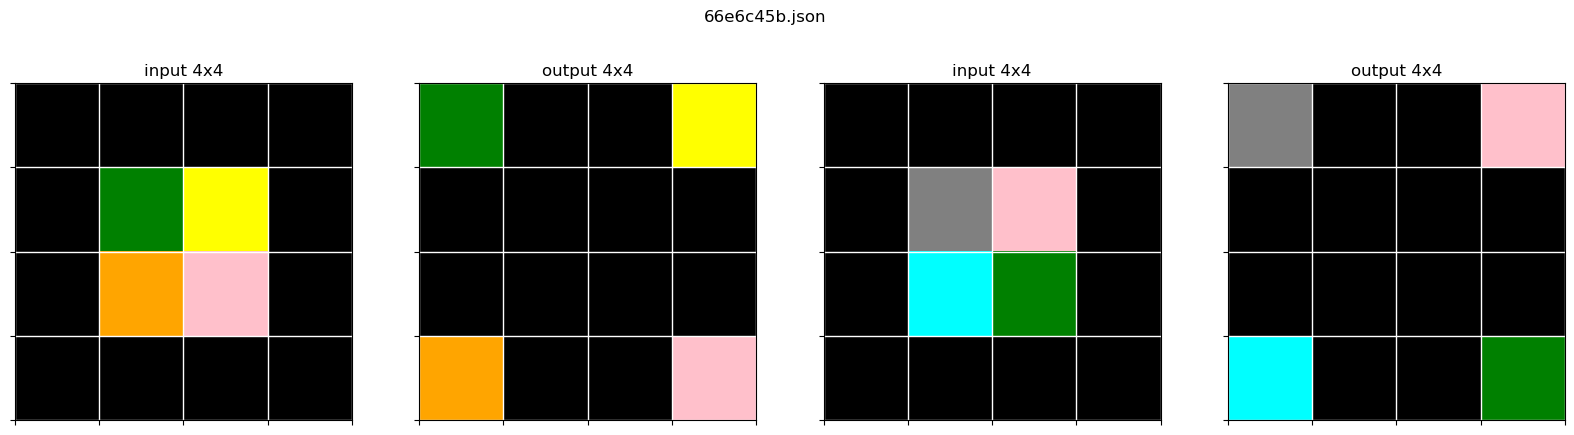

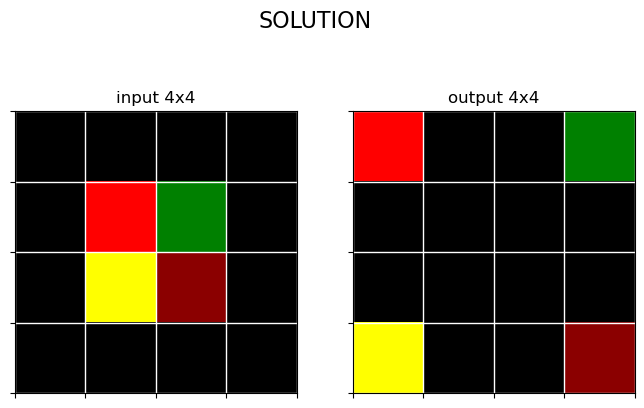

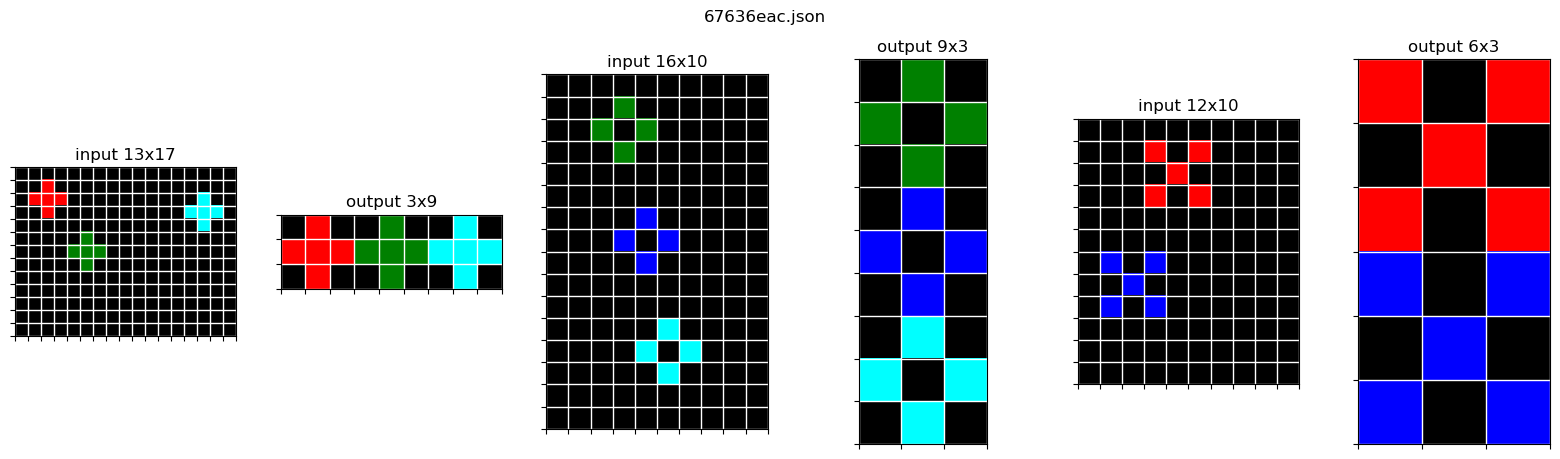

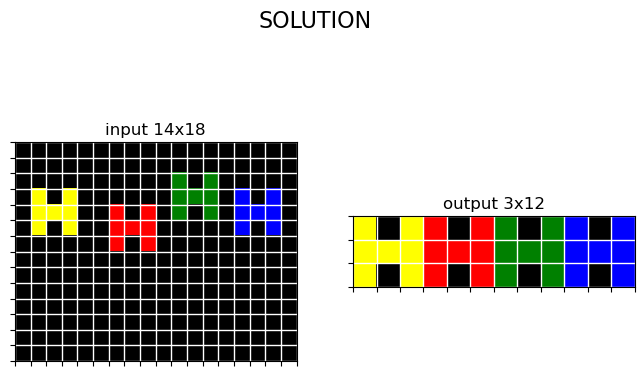

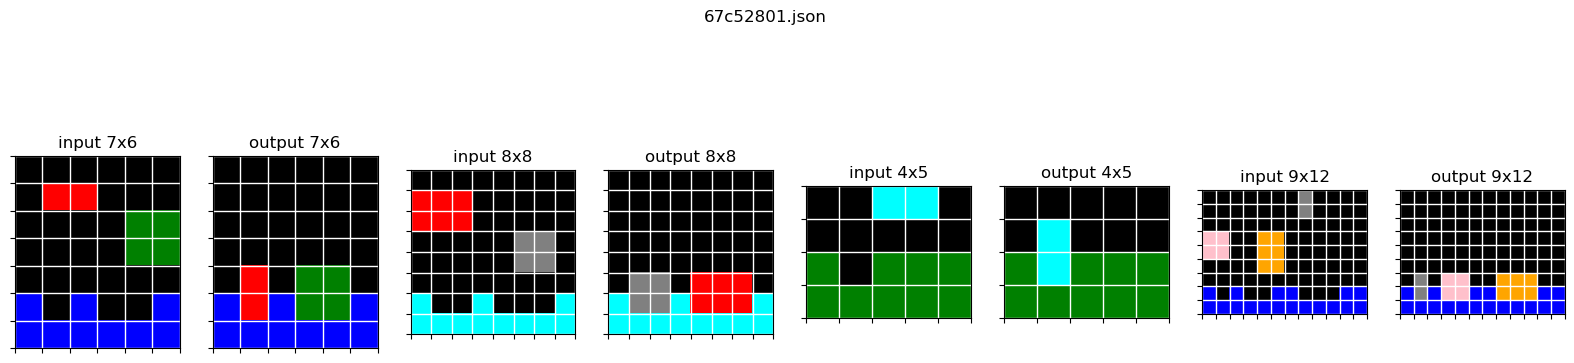

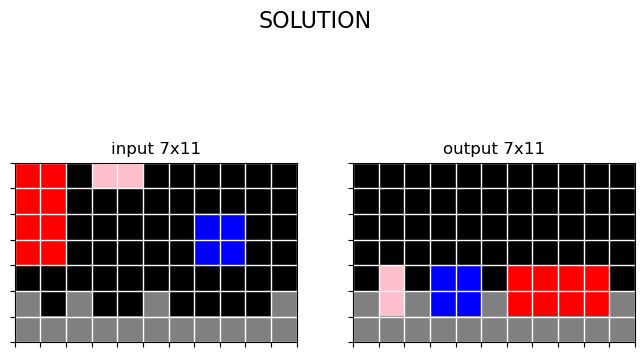

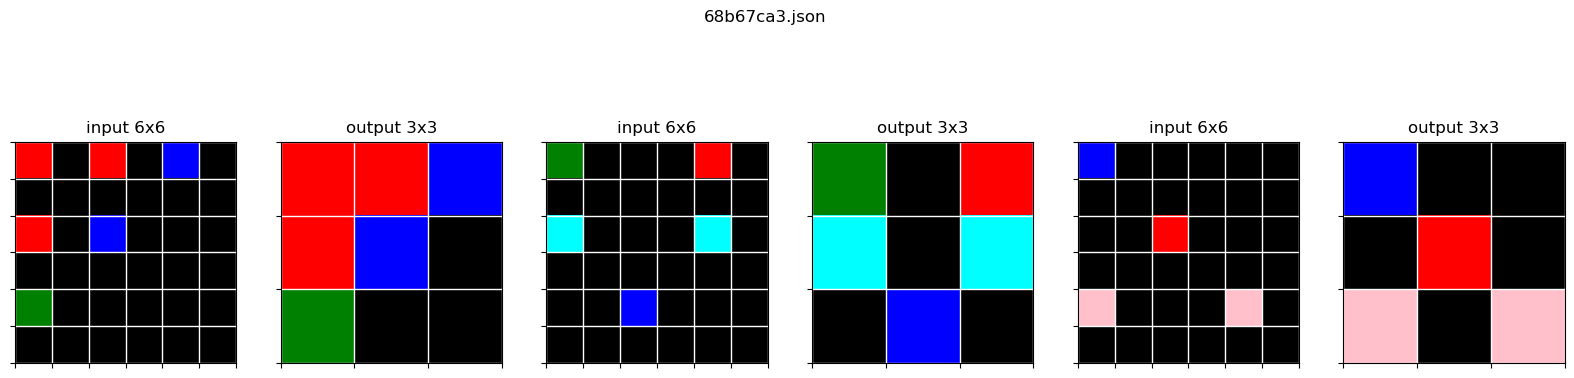

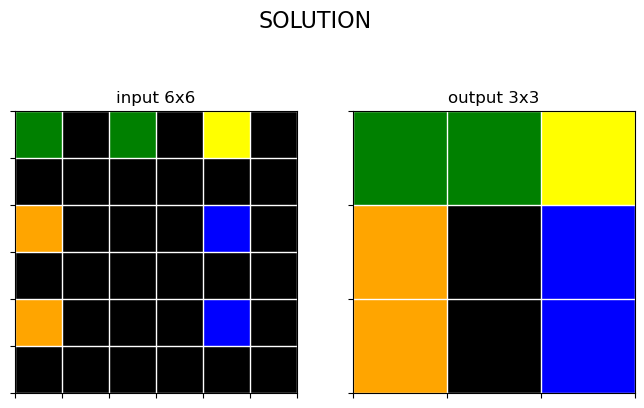

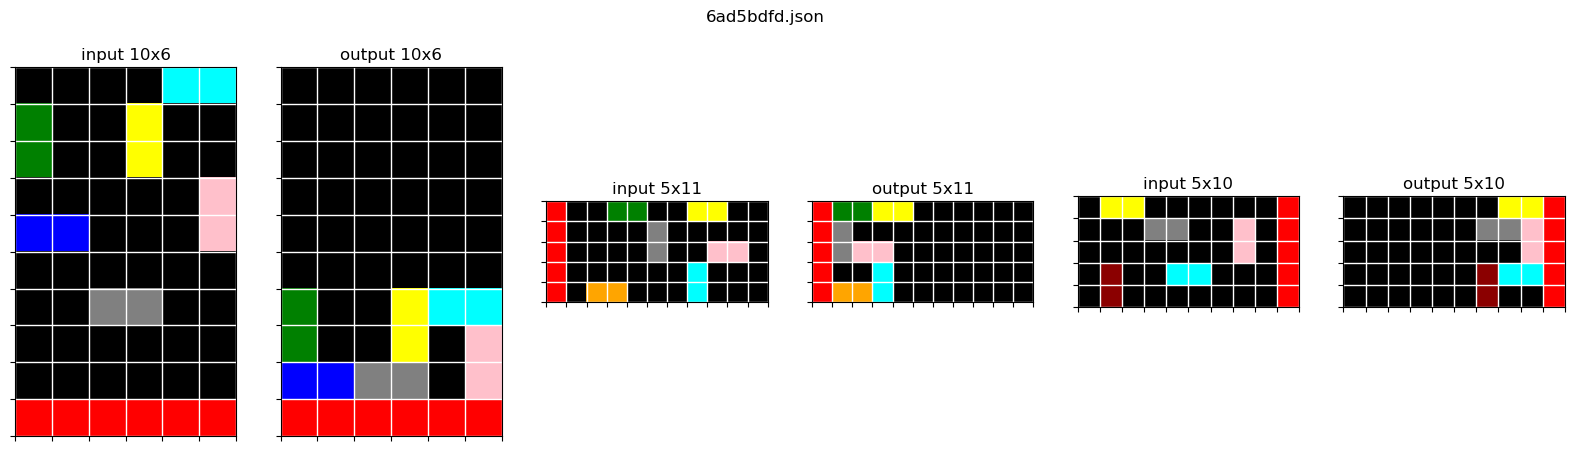

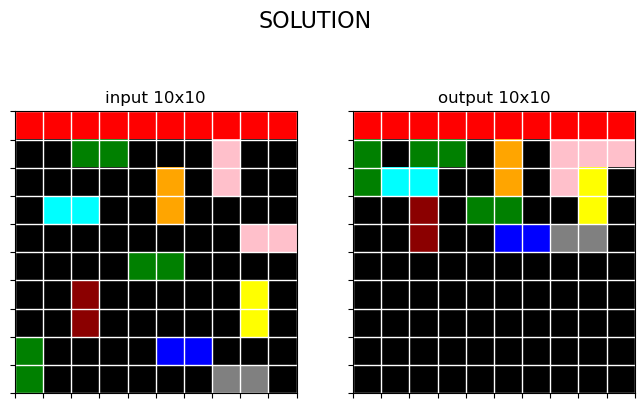

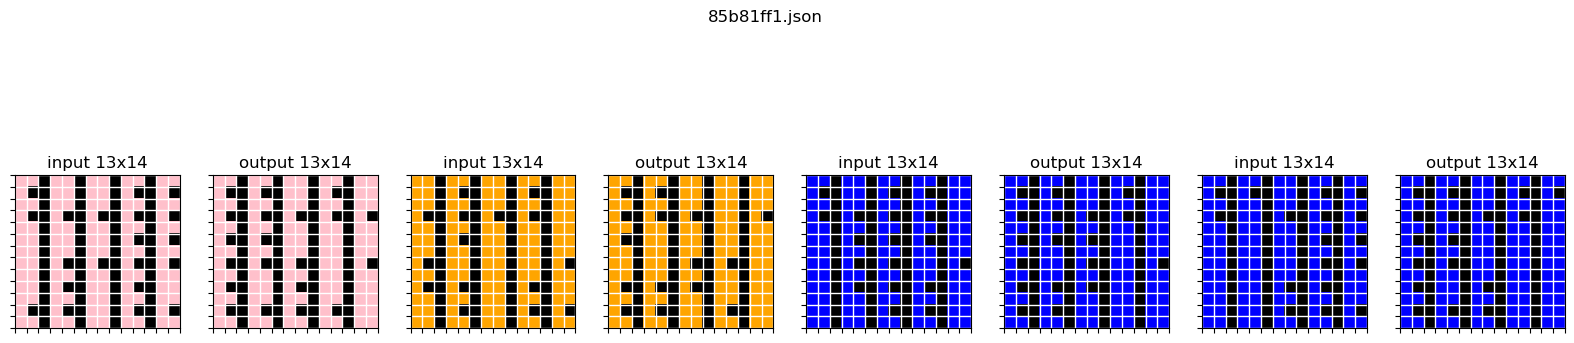

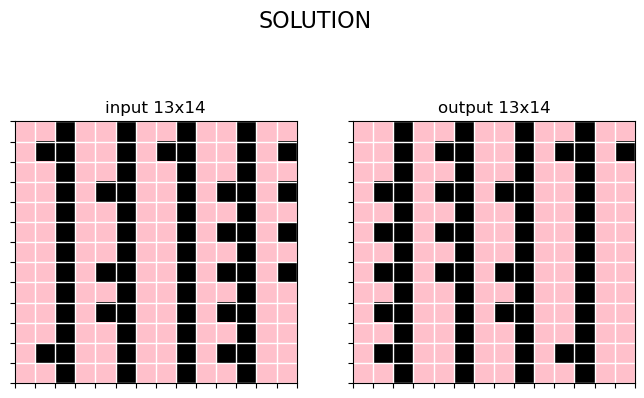

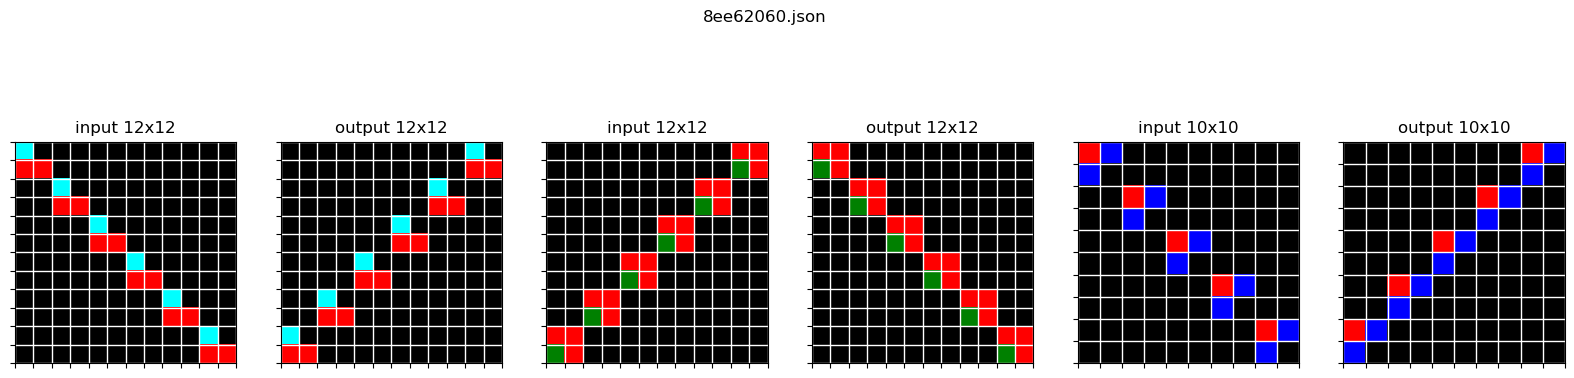

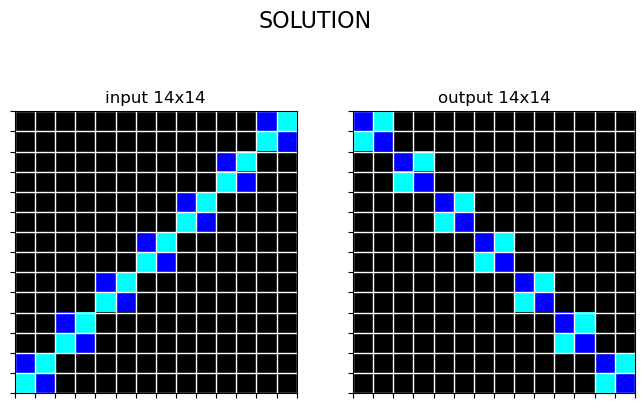

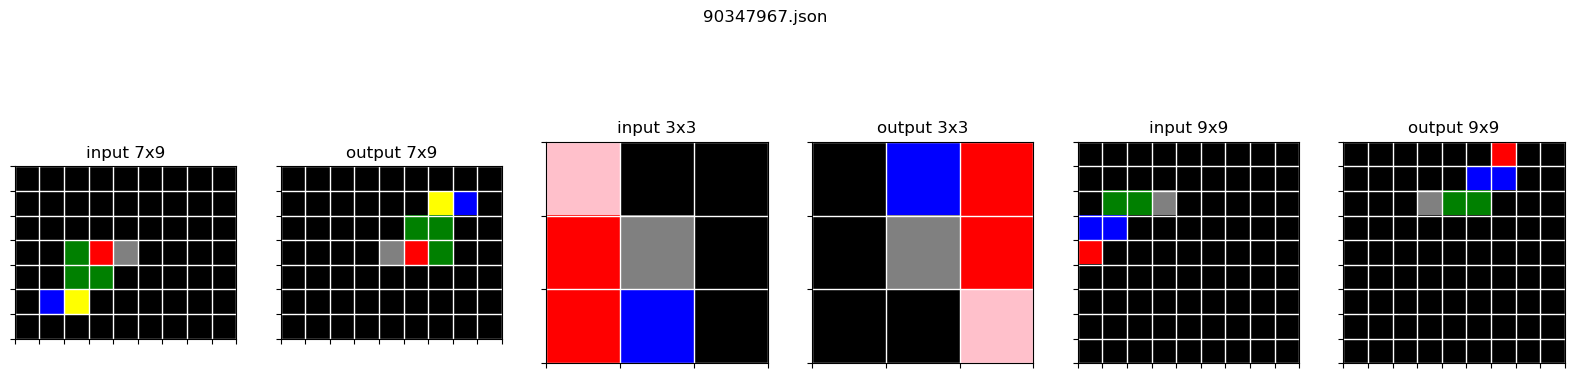

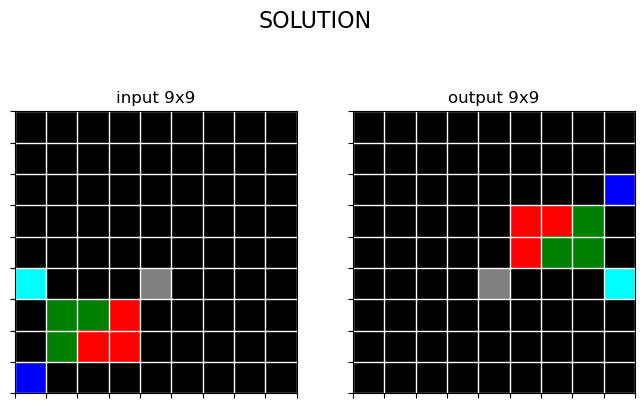

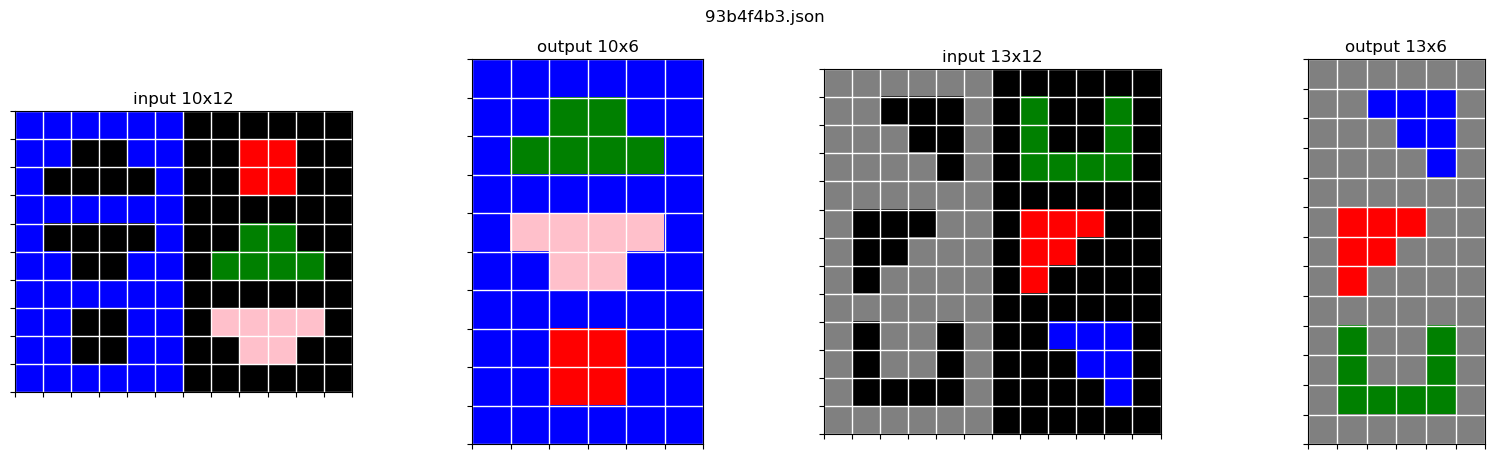

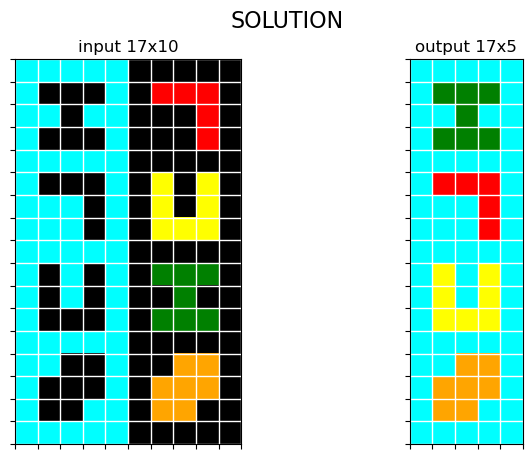

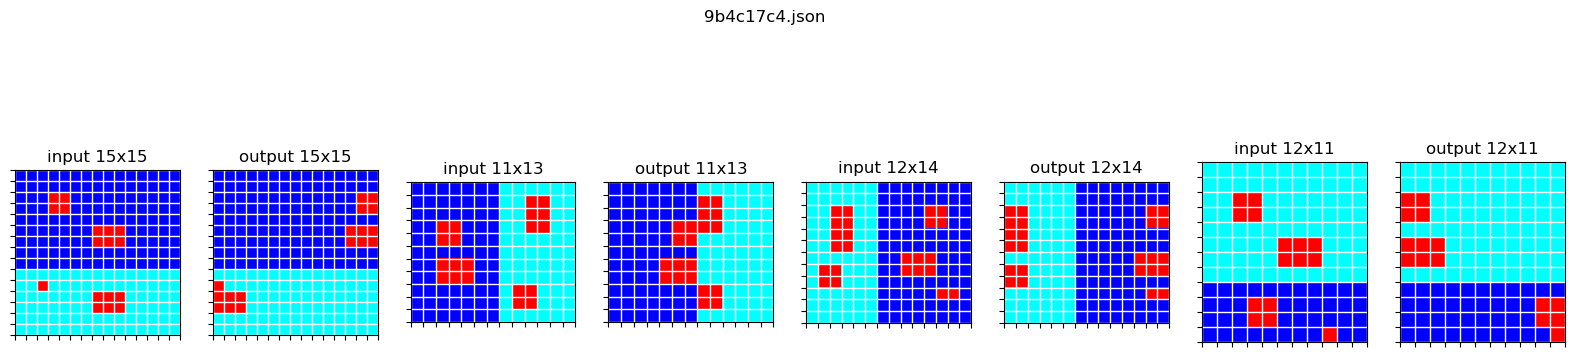

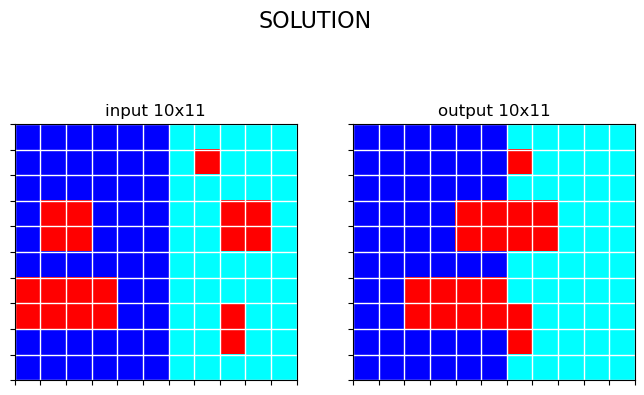

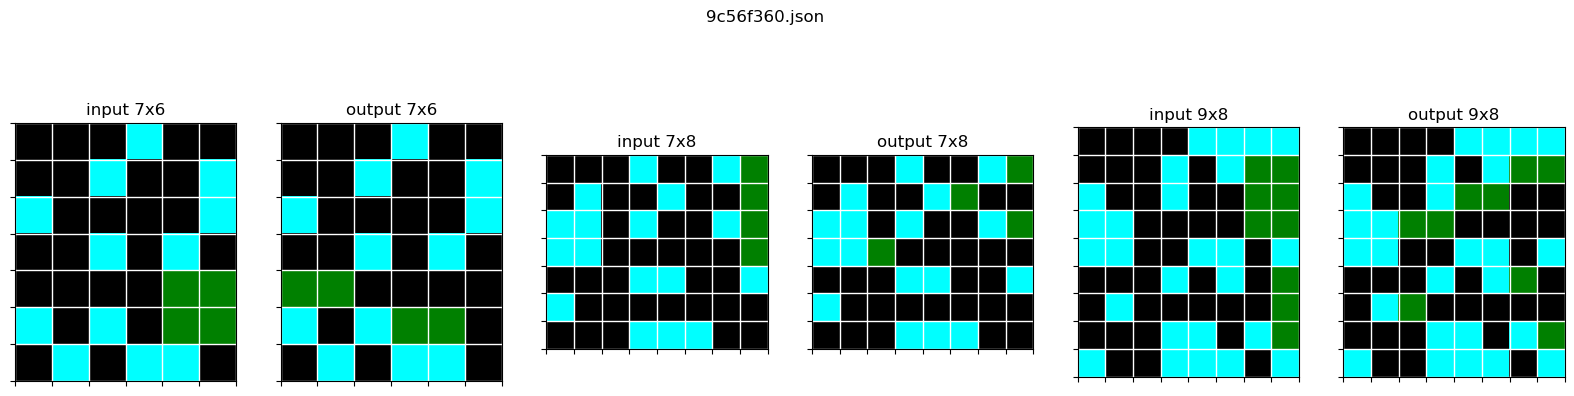

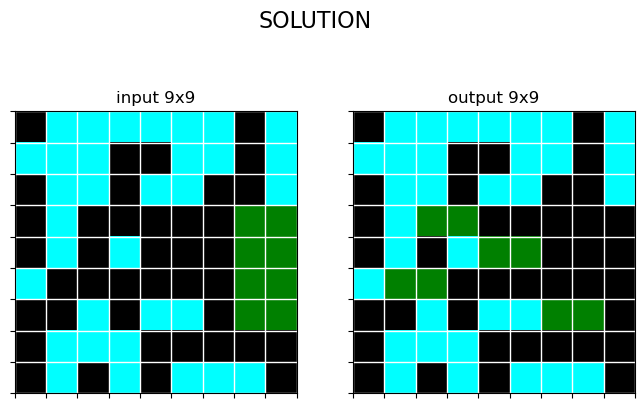

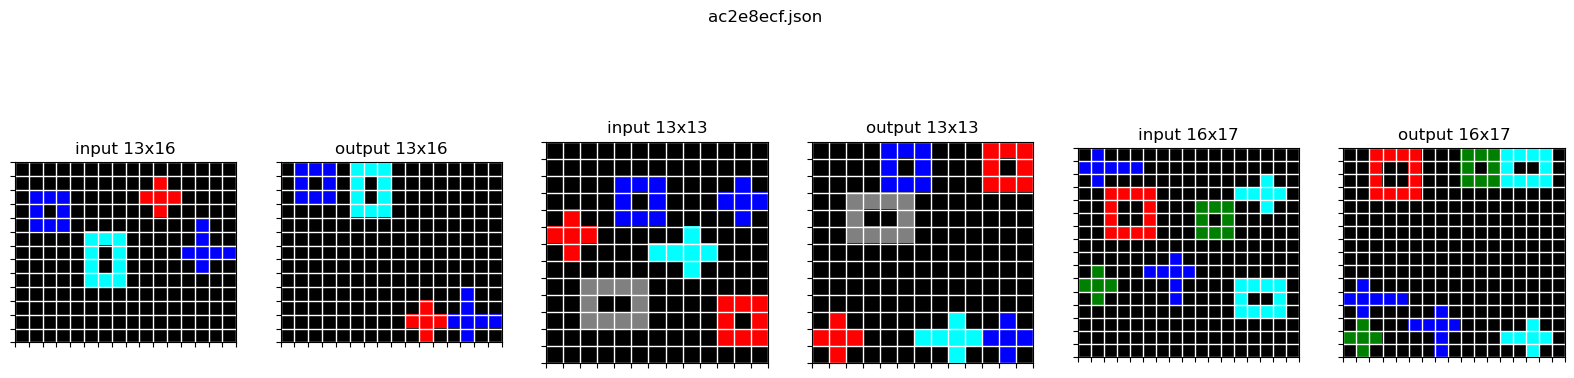

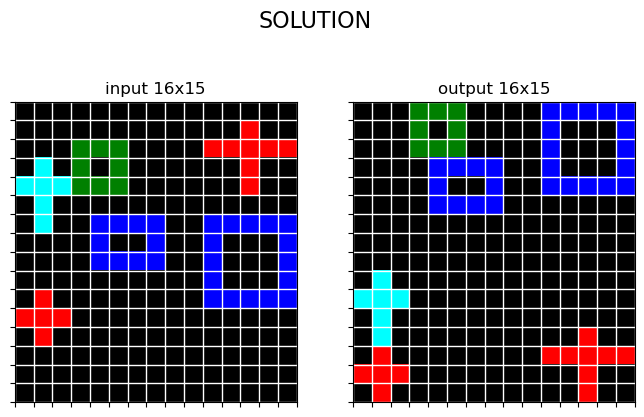

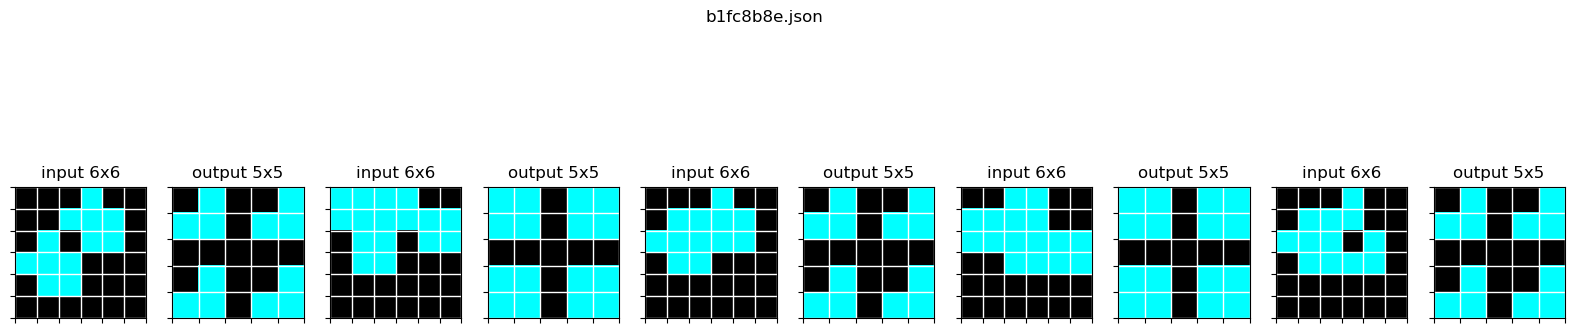

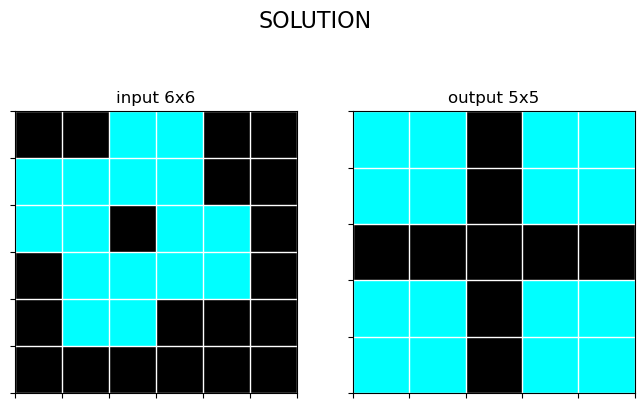

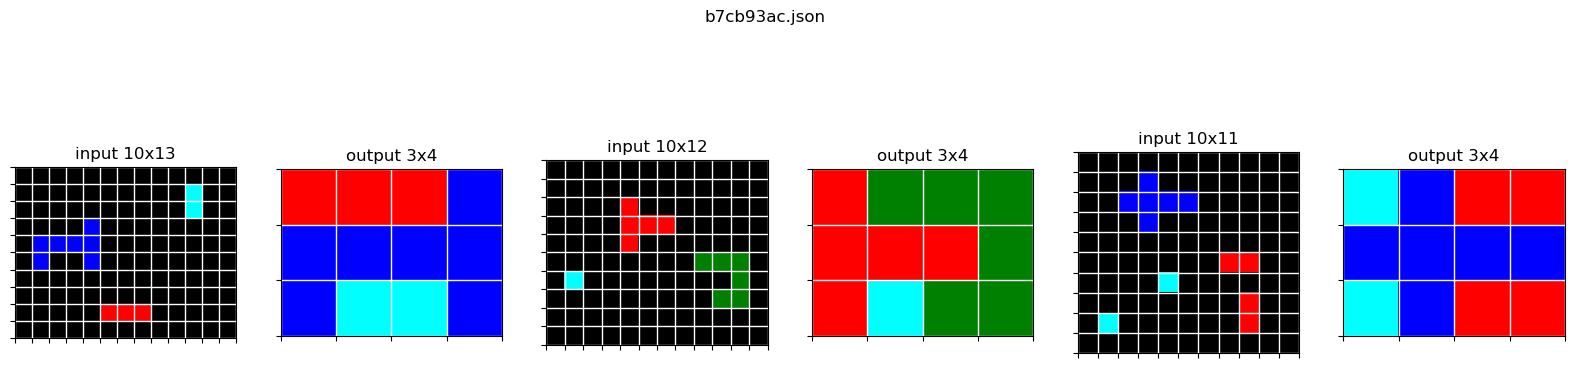

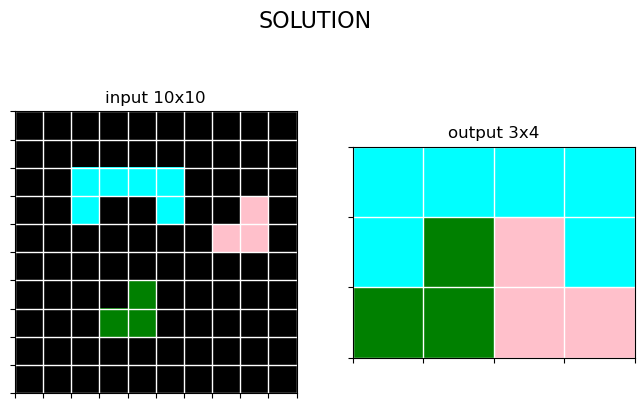

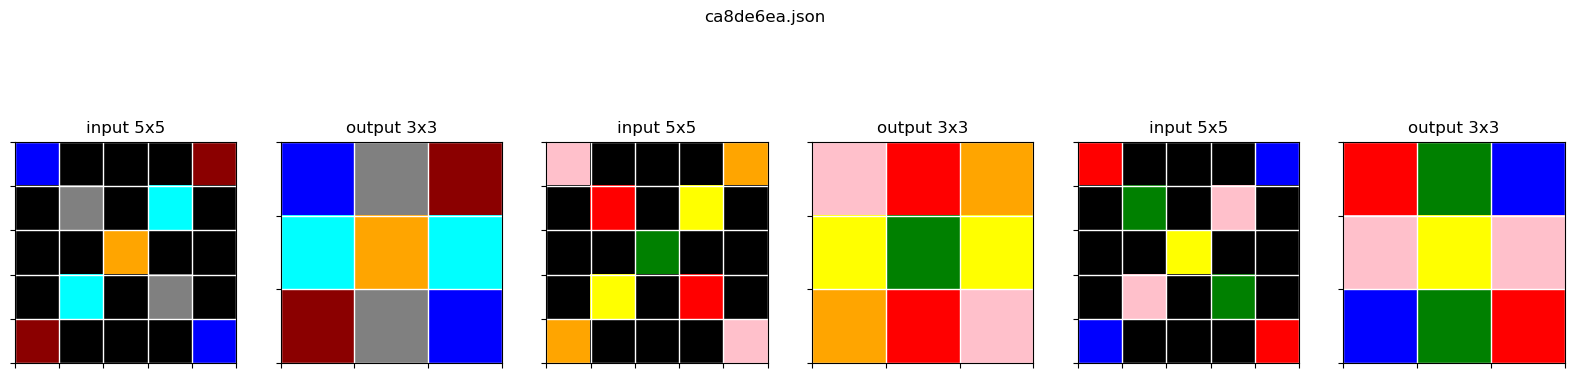

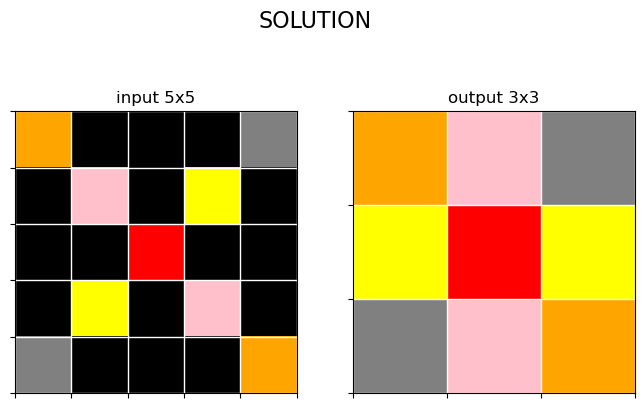

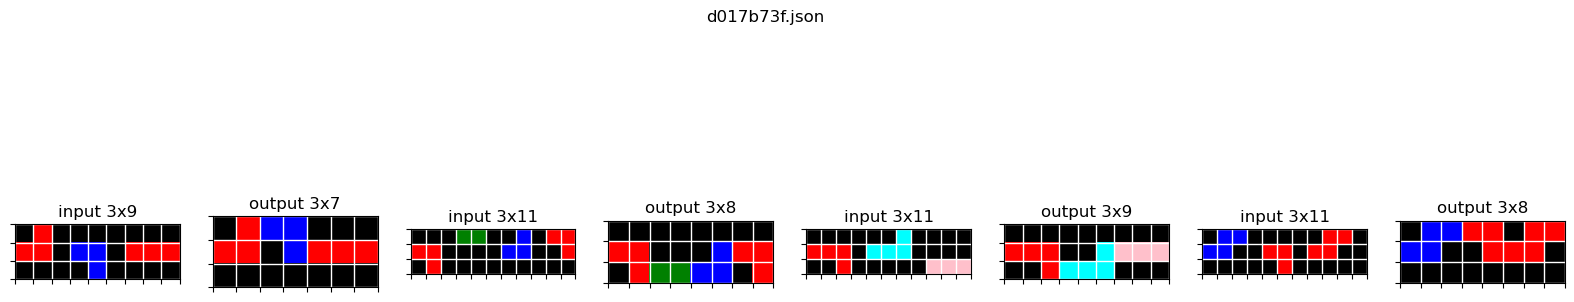

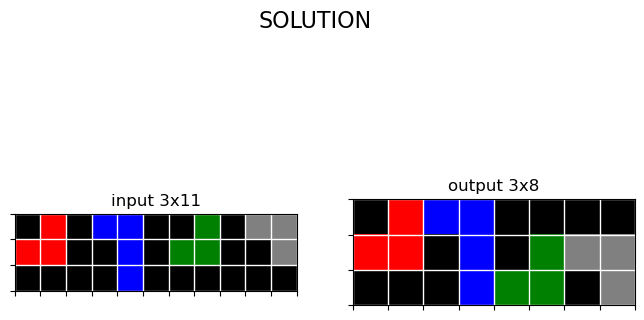

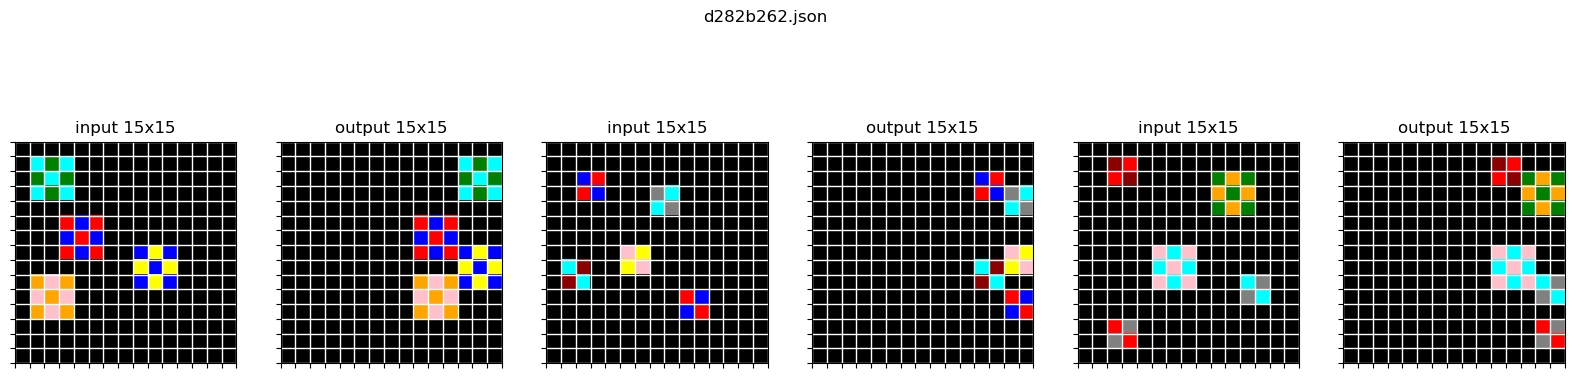

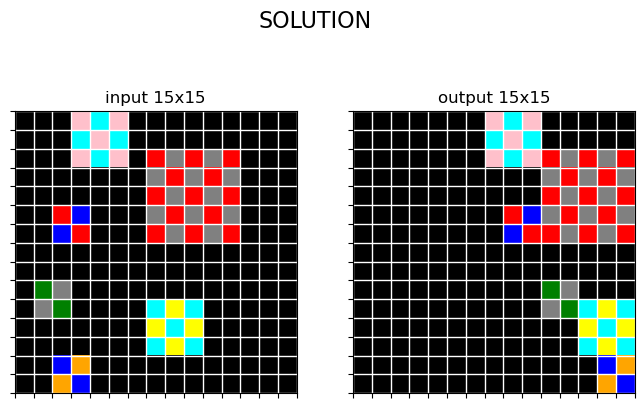

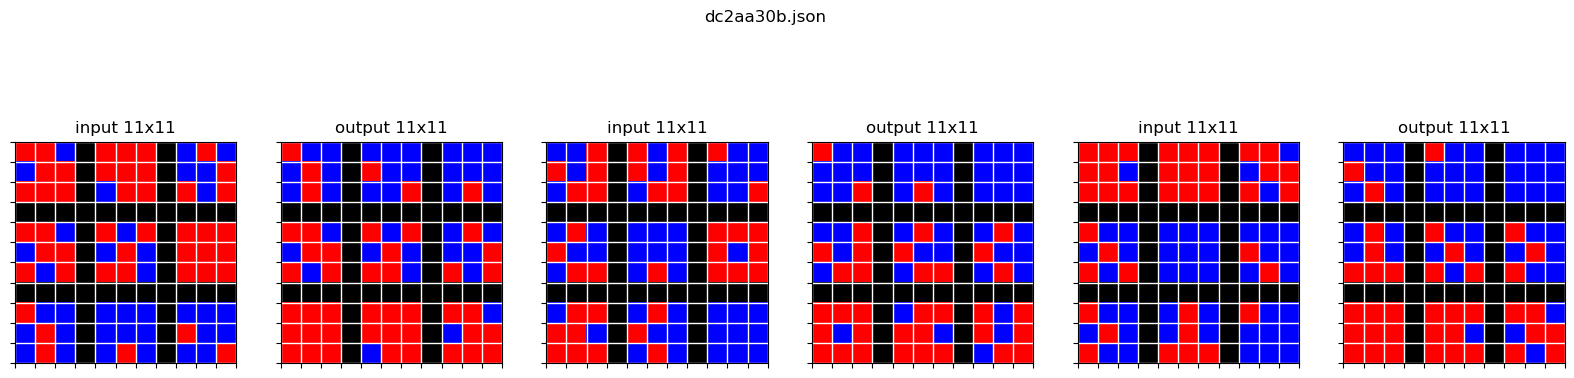

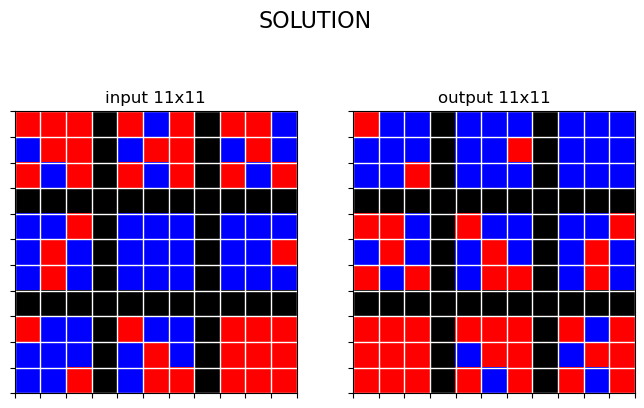

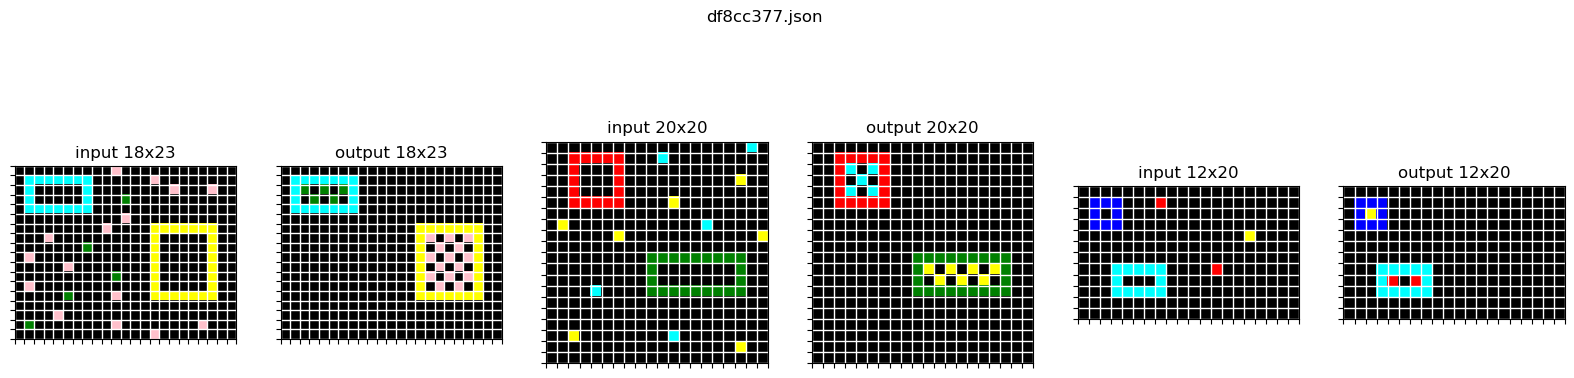

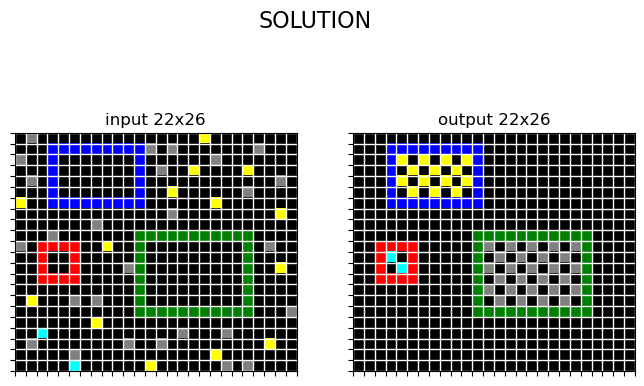

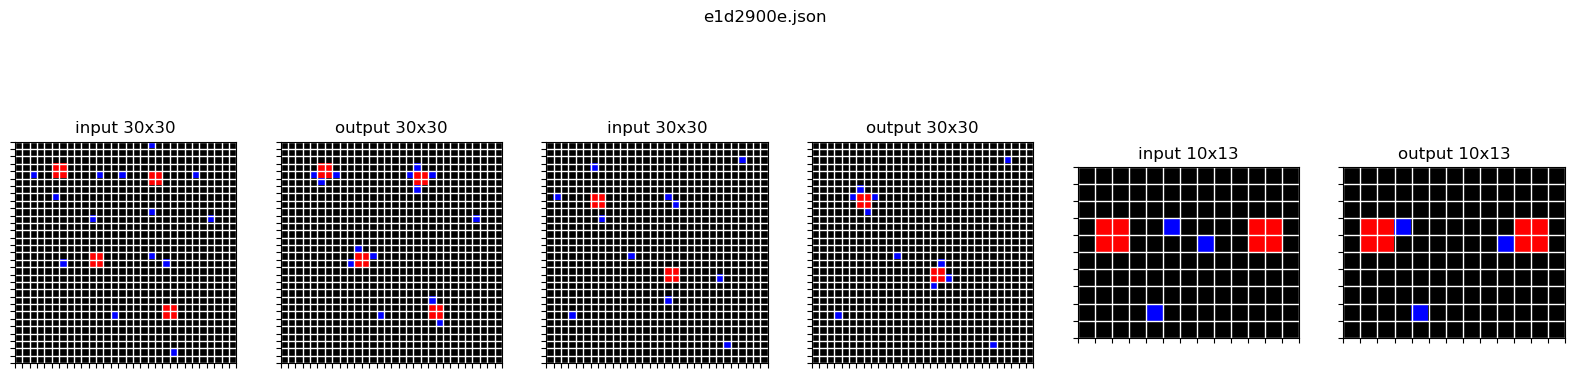

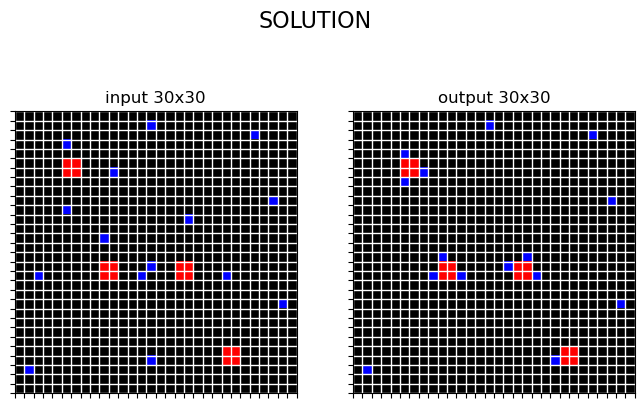

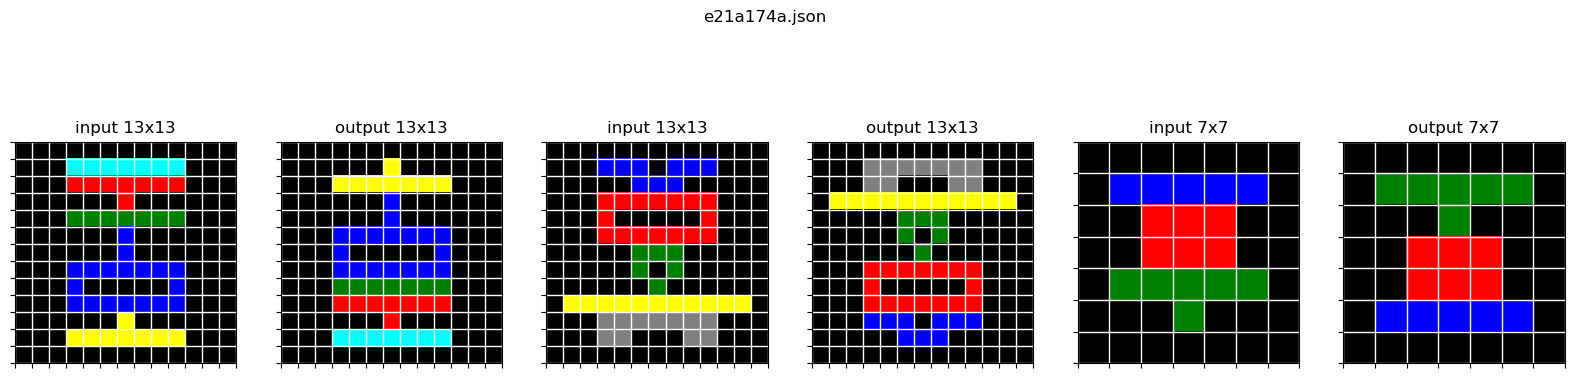

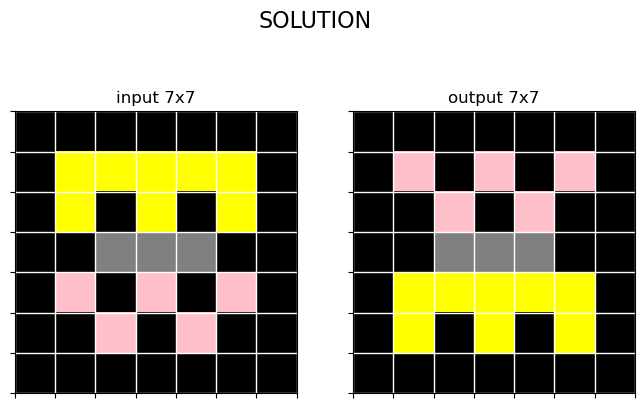

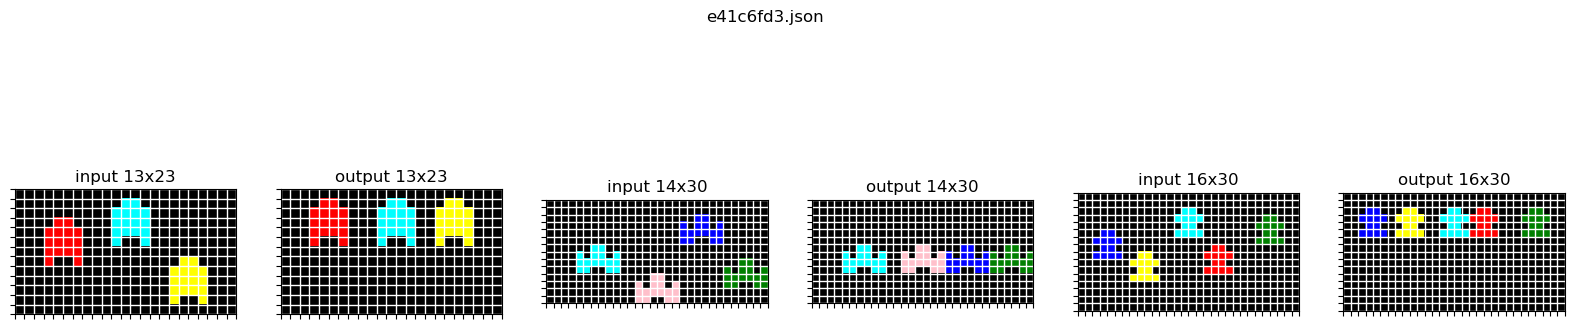

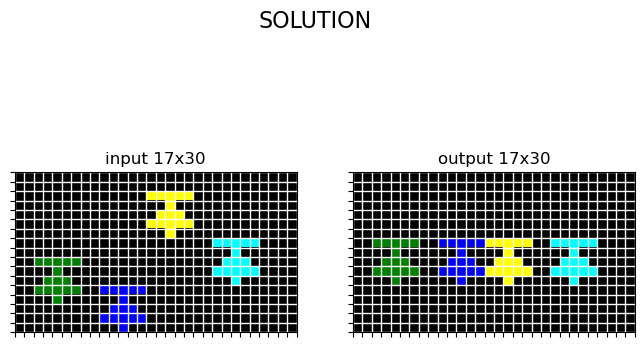

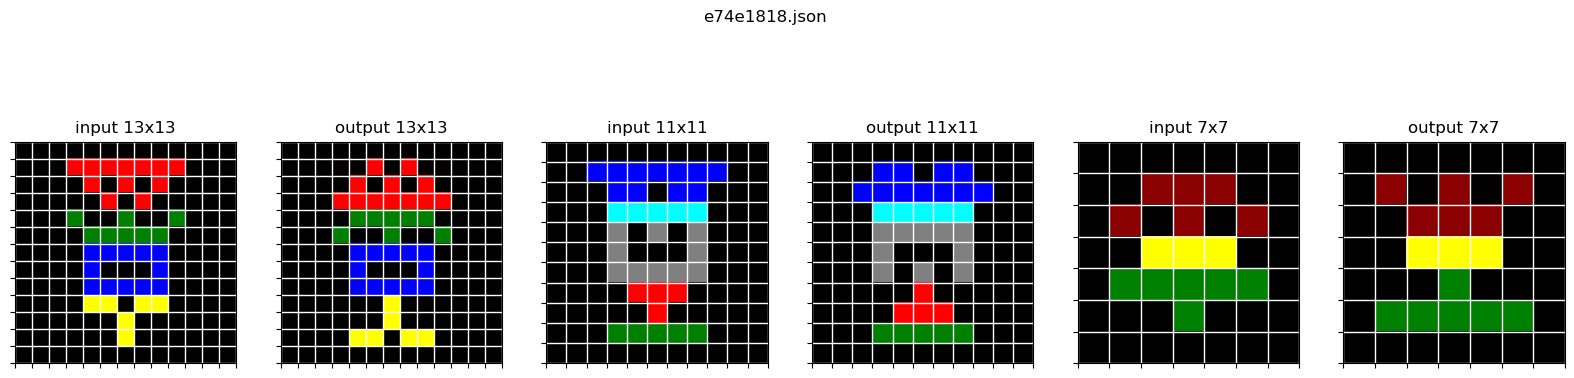

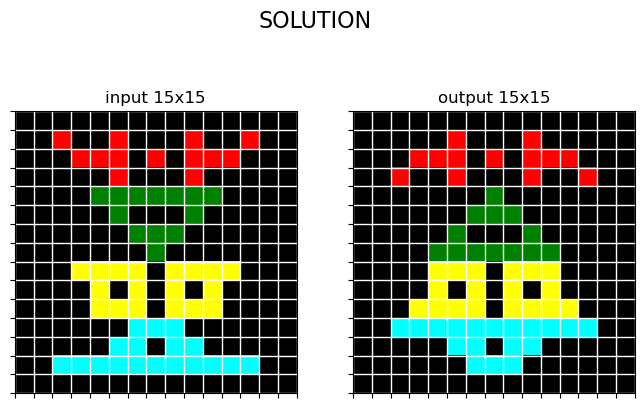

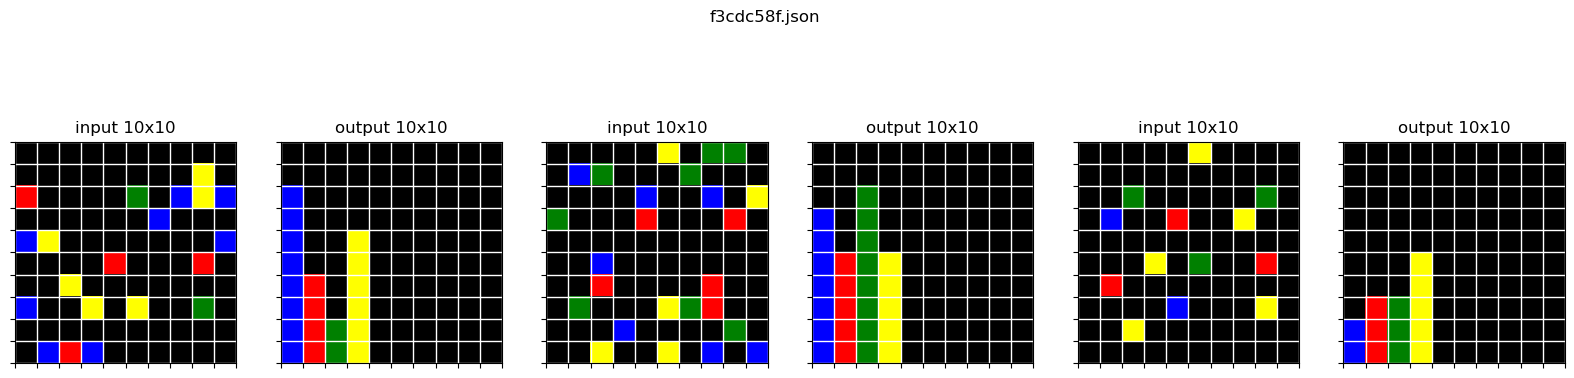

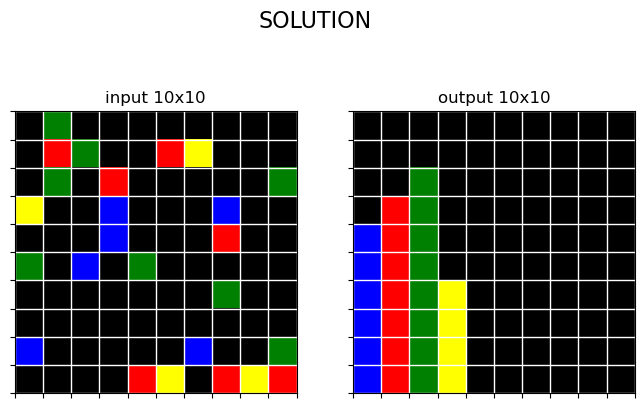

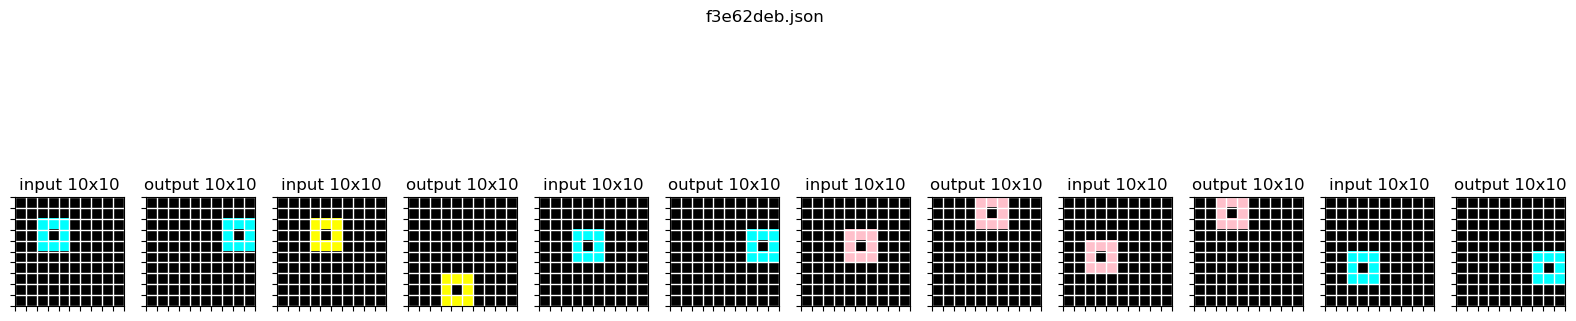

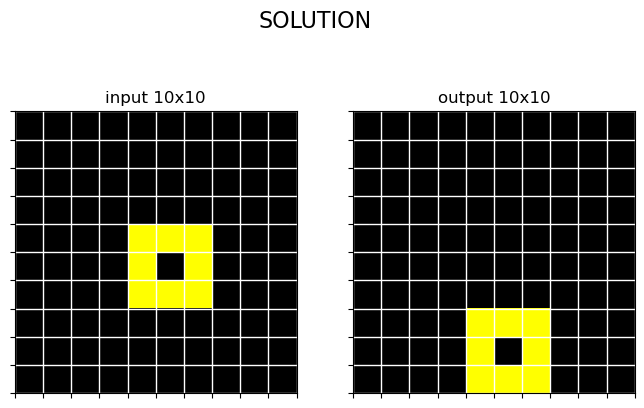

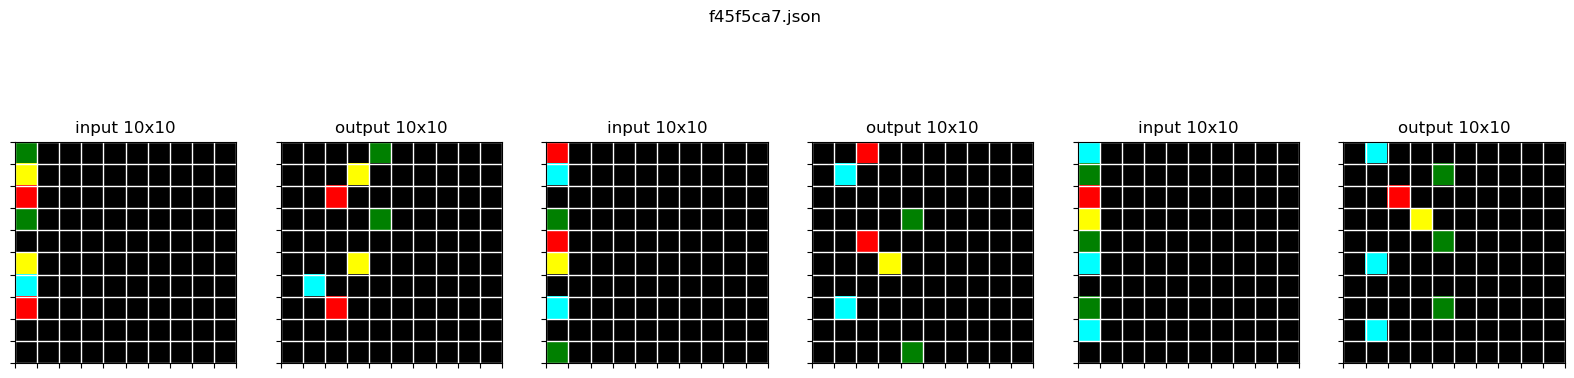

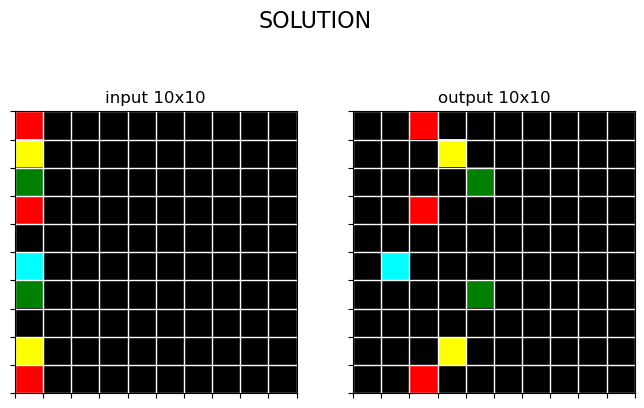

In [9]:
# Find all images where dimensions do not change

#with open(f'{TRAINING_DATA_FOLDER_NAME}/{fileName}', 'r') as file:
#    data = json.loads(file.read())
numberOfSame = 0
fnames = list(filter(lambda x: 'label' not in x, fileNames))
for fileName in fnames:
    with open(f'{TRAINING_DATA_FOLDER_NAME}/{fileName}', 'r') as file:
        data = json.loads(file.read())
        try:
            if all((sum(sum(np.array(d['input']))) - sum(sum(np.array(d['output'])))) == 0 for d in data['train']):
                numberOfSame = numberOfSame + 1
                print(fileName)
                displayTask(fileName)
        except:
            print('Error:', fileName)
print('number:', numberOfSame, 'Percentage:', 100 / len(fnames) * numberOfSame)
    

#for i in fileNames:
    

0
1
2
4
4
2
1
